In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("master_dataset_cleaned.csv")
head = df.head()


In [38]:
monthly_totals = df.groupby(["Year", "Month"])["Total"].sum().reset_index()

print(monthly_totals)

    Year  Month   Total
0   2023      4  2618.0
1   2023      5  1941.0
2   2023      6  2469.0
3   2023      7  1948.0
4   2023      8  1882.0
5   2023      9  2499.0
6   2023     10  3042.0
7   2023     11  2817.0
8   2023     12  2453.0
9   2024      1  2674.0
10  2024      2  3798.0
11  2024      3  2335.0
12  2024      4  2755.0
13  2024      5  2567.0
14  2024      6  2068.0
15  2024      7  2821.0
16  2024      8  2637.0
17  2024      9  2606.0
18  2024     10  3491.0
19  2024     11  3524.0
20  2024     12  3400.0


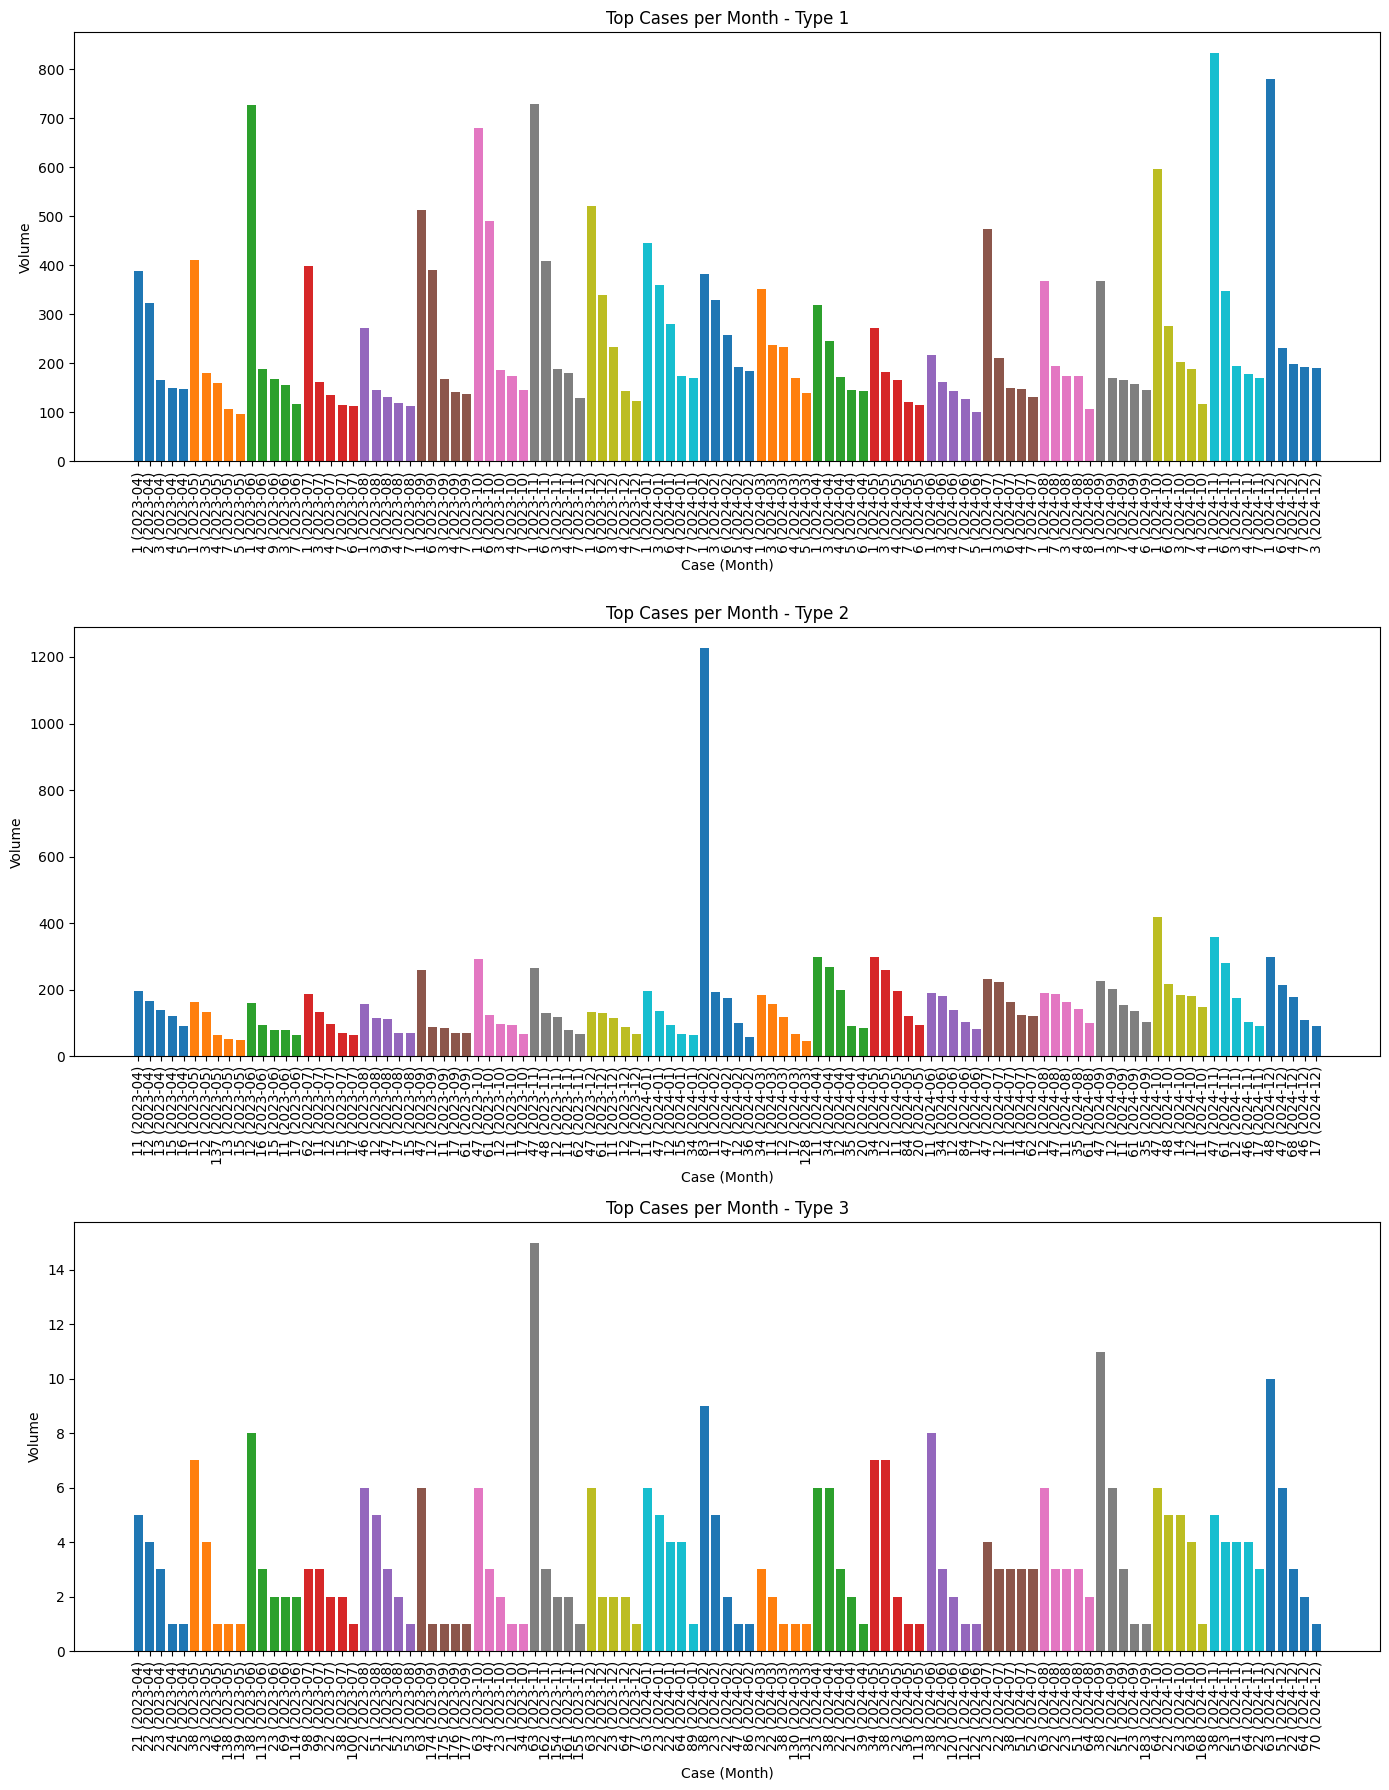

In [39]:
# Group by Year, Month, Consultation_Type, and Case, summing totals
case_monthly = df.groupby(['Year', 'Month', 'Consultation_Type', 'Case'])['Total'].sum().reset_index()

# Create Year-Month label
case_monthly['Year-Month'] = case_monthly['Year'].astype(str) + "-" + case_monthly['Month'].astype(str).str.zfill(2)

# For each month & type of case, get top 5 cases
top_cases_monthly = (
    case_monthly.sort_values(['Year-Month','Consultation_Type','Total'], ascending=[True,True,False])
    .groupby(['Year-Month','Consultation_Type'])
    .head(5)
)

# Plot bar charts: one per Consultation_Type
consult_types = top_cases_monthly['Consultation_Type'].unique()

fig, axes = plt.subplots(len(consult_types), 1, figsize=(14, 6*len(consult_types)))

if len(consult_types) == 1:
    axes = [axes]  # ensure iterable

for ax, ctype in zip(axes, consult_types):
    subset = top_cases_monthly[top_cases_monthly['Consultation_Type'] == ctype]
    # Plot
    for ym in subset['Year-Month'].unique():
        sub = subset[subset['Year-Month'] == ym]
        ax.bar(sub['Case'].astype(str) + " ("+ym+")", sub['Total'], label=ym)
    ax.set_title(f"Top Cases per Month - Type {ctype}")
    ax.set_xlabel("Case (Month)")
    ax.set_ylabel("Volume")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
